# Cleaning the data

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('WELLCOME/WELLCOME_APCspend2013_forThinkful.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [4]:
df.describe()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
count,1928,2127,2126,2127,2127
unique,1880,299,984,2126,1402
top,Not yet available,Elsevier,PLoS One,"Exclusive breastfeeding, diarrhoel morbidity a...",£2040.00
freq,7,387,92,2,94


### Get the five most common journals and the total articles for each

In [5]:
df['Journal title'].isnull().values.any()

True

In [6]:
df = df.dropna(subset=['Journal title'])

In [7]:
df['Journal title'] = df['Journal title'].str.upper()
df['Journal title'] = df['Journal title'].str.replace(' ', '')

In [8]:
df['Journal title'].value_counts()[0:7]

PLOSONE                                      200
JOURNALOFBIOLOGICALCHEMISTRY                  53
NEUROIMAGE                                    29
NUCLEICACIDSRESEARCH                          25
PLOSGENETICS                                  24
PLOSPATHOGENS                                 24
PROCEEDINGSOFTHENATIONALACADEMYOFSCIENCES     22
Name: Journal title, dtype: int64

^^^ The total count for 'Article title' associated with each 'Journal title' record should simply be the count of 'Journal title' considering there is an 'Article title' for every record.

### Get the mean, median and standard deviation of the open-access cost per article for each journal

In [9]:
df['COST (£) charged to Wellcome (inc VAT when charged)'].isnull().values.any()

False

In [10]:
df['new_cost'] = df['COST (£) charged to Wellcome (inc VAT when charged)'].apply(lambda x: ''.join(list(filter(str.isdigit, str(x)))))

In [11]:
df['new_cost_int'] = df['new_cost'].astype(str).astype(int)

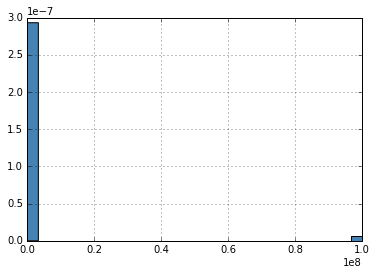

204000      94
99999900    47
150000      37
240000      32
210000      30
Name: new_cost_int, dtype: int64
143945    1
234063    1
371280    1
186962    1
0         1
Name: new_cost_int, dtype: int64


In [12]:
x = df['new_cost_int']

plt.hist(x, normed=True, bins=30, color='steelblue', edgecolor = 'black')
plt.grid(True)
plt.show()

print(df['new_cost_int'].value_counts().head())
print(df['new_cost_int'].value_counts().tail())

In [13]:
df.query('new_cost_int != 99999900')

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged),new_cost,new_cost_int
0,NaN,CUP,PSYCHOLOGICALMEDICINE,Reduced parahippocampal cortical thickness in ...,£0.00,000,0
1,PMC3679557,ACS,BIOMACROMOLECULES,Structural characterization of a Model Gram-ne...,£2381.04,238104,238104
2,23043264 PMC3506128,ACS,JMEDCHEM,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56,64256,64256
3,23438330 PMC3646402,ACS,JMEDCHEM,Orvinols with mixed kappa/mu opioid receptor a...,£669.64,66964,66964
4,23438216 PMC3601604,ACS,JORGCHEM,Regioselective opening of myo-inositol orthoes...,£685.88,68588,68588
5,PMC3579457,ACS,JOURNALOFMEDICINALCHEMISTRY,Comparative Structural and Functional Studies ...,£2392.20,239220,239220
6,PMC3709265,ACS,JOURNALOFPROTEOMERESEARCH,Mapping Proteolytic Processing in the Secretom...,£2367.95,236795,236795
7,23057412 PMC3495574,ACS,MOLPHARM,Quantitative silencing of EGFP reporter gene b...,£649.33,64933,64933
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACSCHEMICALBIOLOGY,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59,129459,129459
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACSCHEMICALBIOLOGY,Chemical proteomic analysis reveals the drugab...,£1294.78,129478,129478


In [14]:
df = df.query('new_cost_int != 99999900')
df = df.query('new_cost_int != 0')

In [15]:
print((np.mean(df['new_cost_int']) / 100))
print((np.median(df['new_cost_int']) / 100))
print((df['new_cost_int'].mode() / 100))

2005.7090904716074
1851.65
0    2040.0
dtype: float64


### Identify the open access prices paid by subject area

Create a dictionary of medical terms, count those words in the titles
Average prices?

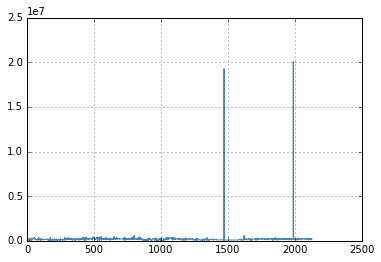

In [20]:
x = df['new_cost_int']

plt.plot(x, color='steelblue')
plt.grid(True)
plt.show()

In [23]:
df[df['Journal title'].str.contains('CHEM')]

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged),new_cost,new_cost_int
2,23043264 PMC3506128,ACS,JMEDCHEM,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56,64256,64256
3,23438330 PMC3646402,ACS,JMEDCHEM,Orvinols with mixed kappa/mu opioid receptor a...,£669.64,66964,66964
4,23438216 PMC3601604,ACS,JORGCHEM,Regioselective opening of myo-inositol orthoes...,£685.88,68588,68588
5,PMC3579457,ACS,JOURNALOFMEDICINALCHEMISTRY,Comparative Structural and Functional Studies ...,£2392.20,239220,239220
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACSCHEMICALBIOLOGY,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59,129459,129459
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACSCHEMICALBIOLOGY,Chemical proteomic analysis reveals the drugab...,£1294.78,129478,129478
10,PMCID: PMC3739413,ACS (Amercian Chemical Society) Publications,JOURNALOFCHEMICALINFORMATIONANDMODELING,Locating Sweet Spots for Screening Hits and Ev...,£1329.69,132969,132969
11,PMCID: PMC3530961,ACS (Amercian Chemical Society) Publications,JOURNALOFMEDICINALCHEMISTRY,Synthesis and evaluation of ?-thymidine analog...,£1287.20,128720,128720
12,PMCID: PMC3624797,ACS (Amercian Chemical Society) Publications,JOURNALOFMEDICINALCHEMISTRY,Discovery and structure-activity relationships...,£1324.66,132466,132466
13,PMC3413243,ACS Publications,BIOCHEMISTRY,Monomeric 14-3-3 has a chaperone-like activity...,£665.64,66564,66564
